# What do we need an RNN?

The structure of an Artificial Neural Network is relatively simple and
is mainly about matrice multiplication. During the first step, inputs
are multiplied by initially random weights, and bias, transformed with
an activation function and the output values are used to make a
prediction. This step gives an idea of how far the network is from the
reality.

The metric applied is the loss. The higher the loss function, the dumber
the model is. To improve the knowledge of the network, some optimization
is required by adjusting the weights of the net. The stochastic gradient
descent is the method employed to change the values of the weights in
the rights direction. Once the adjustment is made, the network can use
another batch of data to test its new knowledge.

The error, fortunately, is lower than before, yet not small enough. The
optimization step is done iteratively until the error is minimized,
i.e., no more information can be extracted.

The problem with this type of model is, it does not have any memory. It
means the input and output are independent. In other words, the model
does not care about what came before. It raises some question when you
need to predict time series or sentences because the network needs to
have information about the historical data or past words.

To overcome this issue, a new type of architecture has been developed:
Recurrent Neural network (RNN hereafter)

## What is a Recurrent Neural Network (RNN)?

A recurrent neural network looks quite similar to a traditional neural
network except that a memory-state is added to the neurons. The
computation to include a memory is simple.

Imagine a simple model with only one neuron feeds by a batch of data. In
a traditional neural net, the model produces the output by multiplying
the input with the weight and the activation function. With an RNN, this
output is sent back to itself $n$ number of time. We call **timestep**
the amount of time the output becomes the input of the next matrice
multiplication.

For instance, in the picture below, you can see the network is composed
of one neuron. The network computes the matrices multiplication between
the input and the weight and adds non-linearity with the activation
function. It becomes the output at t-1. This output is the input of the
second matrices multiplication.

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/21_RNN_V3_files/image002.png)

Below, we code a simple RNN in tensorflow to understand the step and
also the shape of the output.

The network is composed of:

-   Four inputs

-   Six neurons

-   2-time steps

The network will proceed as depicted by the picture below.

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/21_RNN_V3_files/image004.png)

The network is called ‘recurrent’ because it performs the same operation
in each *activate square.* The network computed the weights of the
inputs and the previous output before to use an activation function.

In [1]:
import numpy as np
import tensorflow as tf
n_inputs = 4
n_neurons = 6
n_timesteps = 2

/Users/Thomas/anaconda3/envs/hello-tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


The data is a sequence of a number from 0 to 9 and divided into three
batches of data.

In [2]:
## Data 
X_batch = np.array([
        [[0, 1, 2, 5], [9, 8, 7, 4]], # Batch 1
        [[3, 4, 5, 2], [0, 0, 0, 0]], # Batch 2
        [[6, 7, 8, 5], [6, 5, 4, 2]], # Batch 3
    ])

We can build the network with a placeholder for the data, the recurrent
stage and the output.

1)  Define the placeholder for the data

`X = tf.placeholder(tf.float32, [None, n_timesteps, n_inputs])`

Here:

-   `None`: Unknown and will take the size of the batch

-   `n_timesteps`: Number of time the network will send the output back
    to the neuron

-   `n_inputs`: Number of input per batch

1)  Define the recurrent network

As mentioned in the picture above, the network is composed of 6 neurons.
The network will compute two dot product:

-   Input data with the first set of weights (i.e., 6: equal to the
    number of neurons)

-   Previous output with a second set of weights (i.e., 6: corresponding
    to the number of output)

Note that, during the first feedforward, the values of the previous
output are equal to zeroes because we don't have any value available.

The object to build an RNN is `tf.contrib.rnn.BasicRNNCell` with the
argument `num_units` to define the number of input

`basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)`

Now that the network is defined, you can compute the
`outputs ``and`` states`

`outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)`

This object uses an internal loop to multiply the matrices the
appropriate number of times.

Note that the recurent neuron is a function of all the inputs of the
previous time steps. This is how the network build its own memory. The
information from the previous time can propagate in future time. This is
the magic of Recurrent neural network

In [3]:
## Define the shape of the tensor
X = tf.placeholder(tf.float32, [None, n_timesteps, n_inputs])
## Define the network
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    print(states.eval(feed_dict={X: X_batch}))

[[-0.9999238   0.99430686 -0.9638557  -0.9994302  -0.997174   -0.86753696]
 [-0.02186426  0.42749134  0.12737474  0.16807137  0.5695009   0.5968522 ]
 [-0.9978742   0.9293986  -0.89790034 -0.98720515 -0.90166324 -0.291719  ]]


For explanatory purposes, you print the values of the previous state. The output printed above shows the output from the last state. Now print all the output, you can notice the states are the previous output of each batch. That is, the previous output contains the information about the entire sequence.e

In [4]:
print(outputs_val)    
print(outputs_val.shape)    

[[[-0.9192994   0.9710009  -0.35473573  0.4106098  -0.8282092
    0.9195943 ]
  [-0.9999238   0.99430686 -0.9638557  -0.9994302  -0.997174
   -0.86753696]]

 [[-0.9969728   0.95827335 -0.24309447 -0.9053337  -0.17600021
    0.3927361 ]
  [-0.02186426  0.42749134  0.12737474  0.16807137  0.5695009
    0.5968522 ]]

 [[-0.9999831   0.9979963  -0.82032    -0.9925979  -0.93228835
    0.46669725]
  [-0.9978742   0.9293986  -0.89790034 -0.98720515 -0.90166324
   -0.291719  ]]]
(3, 2, 6)


![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/21_RNN_V3_files/image006.png)

The output has the shape of (3, 2, 6):

-   3: Number of batches

-   2: Number of the timestep

-   6: Number of neurons

The optimization of a recurrent neural network is identical to a
traditional neural network. You will see in more detail how to code
optimization in the next part of this tutorial.

## Applications of RNN

RNN has multiple uses, especially when it comes to predicting the
future. In the financial industry, RNN can be helpful in predicting
stock prices or the sign of the stock market direction (i.e., positive
or negative).

RNN is useful for an autonomous car as it can avoid a car accident by
anticipating the trajectory of the vehicle.

RNN is widely used in text analysis, image captioning, sentiment
analysis and machine translation. For example, one can use a movie
review to understand the feeling the spectator perceived after watching
the movie. Automating this task is very useful when the movie company
does not have enough time to review, label, consolidate and analyze the
reviews. The machine can do the job with a higher level of accuracy.

## Limitations of RNN

In theory, RNN is supposed to carry the information up to time $t$.
However, it is quite challenging to propagate all this information when
the time step is too long. When a network has too many deep layers, it
becomes untrainable. This problem is called: **vanishing gradient
problem**. If you remember, the neural network updates the weight using
the gradient descent algorithm. The gradients grow smaller when the
network progress down to lower layers.

In conclusion, the gradients stay constant meaning there is no space for
improvement. The model learns from a change in the gradient; this change
affects the network's output. However, if the difference in the gradient
is too small (i.e., the weights change a little), the network can't
learn anything and so the output. Therefore, a network facing a
vanishing gradient problem cannot converge toward a good solution.

## Improvement LSMT

To overcome the potential issue of vanishing gradient faced by RNN,
three researchers, Hochreiter, Schmidhuber and Bengio improved the RNN
with an architecture called Long Short-Term Memory (LSTM). In brief,
LSMT provides to the network relevant past information to more recent
time. The machine uses a better architecture to select and carry
information back to later time.

LSTM architecture is available in TensorFlow, tf.contrib.rnn.LSTMCell.
LSTM is out of the scope of the tutorial. You can refer to the official
[documentation](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)
for further information

## RNN in time series

In this tutorial, you will use an RNN with time series data. Time series
are dependent to previous time which means past values includes relevant
information that the network can learn from. The idea behind time series
prediction is to estimate the future value of a series, let's say, stock
price, temperature, GDP and so on.

The data preparation for RNN and time series can be a little bit tricky.
First of all, the objective is to predict the next value of the series,
meaning, you will use the past information to estimate the value at
$t + 1$. The label is equal to the input sequence and shifted one period
ahead. Secondly, the number of input is set to 1, i.e., one observation
per time. Lastly, the time step is equal to the sequence of the
numerical value. For instance, if you set the time step to 10, the input
sequence will return ten consecutive times.

Look at the graph below, we have represented the time series data on the
left and a fictive input sequence on the right. You create a function to
return a dataset with random value for each day from January 2001 to
December 2016

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

def create_ts(start = '2001', n = 201, freq = 'M'):
    rng = pd.date_range(start=start, periods=n, freq=freq)
    ts = pd.Series(np.random.uniform(-18, 18, size=len(rng)), rng).cumsum()
    return ts

ts= create_ts(start = '2001', n = 192, freq = 'M')
ts.tail(5)

2016-08-31    29.244005
2016-09-30    18.769957
2016-10-31    16.676111
2016-11-30    27.457955
2016-12-31    24.407237
Freq: M, dtype: float64

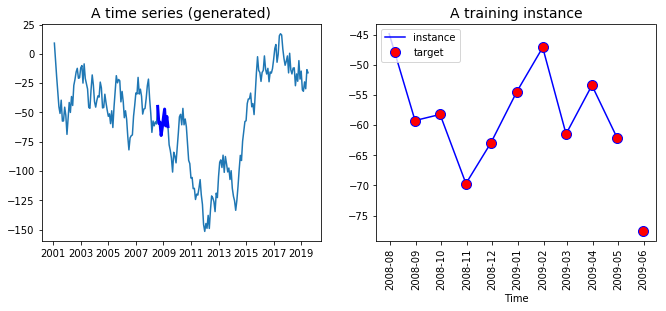

In [6]:
ts = create_ts(start = '2001', n = 222)

# Left
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(ts.index, ts)
plt.plot(ts.index[90:100], ts[90:100], "b-", linewidth=3, label="A training instance")
plt.title("A time series (generated)", fontsize=14)

# Right
plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(ts.index[90:100], ts[90:100], "b-", markersize=8, label="instance")
plt.plot(ts.index[91:101], ts[91:101], "bo", markersize=10, label="target", markerfacecolor='red')
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.show()

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/21_RNN_V3_files/image010.png)

The right part of the graph shows all series. It starts from 2001 and
finishes in 2019 It makes no sense to feed all the data in the network,
instead, you need to create a batch of data with a length equal to the
time step. This batch will be the X variable. The Y variable is the same
as X but shifted by one period (i.e., you want to forecast t+1).

Both vectors have the same length. You can see it in the right part of
the above graph. The line represents the ten values of the X input,
while the red dots are the ten values of the label, Y. Note that, the
label starts one period ahead of X and finishes one period after.

# Build an RNN to predict Time Series

Now, it is time to build your first RNN to predict the series above. You
need to specify some hyperparameters (the parameters of the model, i.e.,
number of neurons, etc.) for the model:

-   Number of input: 1

-   Time step (windows in time series): 10

-   Number of neurons: 120

-   Number of output: 1

Your network will learn from a sequence of 10 days and contain 120
recurrent neurons. You feed the model with one input, i.e., one day.
Feel free to change the values to see if the model improved.

Before to construct the model, you need to split the dataset into a
train set and test set. The full dataset has 222 data points; you will
use the first 201 point to train the model and the last 21 points to
test your model.

After you define a train and test set, you need to create an object
containing the batches. In this batches, you have X values and Y values.
Remember that the X values are one period lagged. Therefore, you use the
first 200 observations and the time step is equal to 10. The `X_batches`
object should contain 20 batches of size 10\*1. The `y_batches` has the
same shape as the `X_batches` object but with one period ahead.

**Step 1)** Create the train and test

First of all, you convert the series into a numpy array; then you define
the windows (i.e., the number of time the network will learn from), the
number of input, output and the size of the train set.

In [7]:
series = np.array(ts)
n_windows = 20   
n_input =  1
n_output = 1
size_train = 201

After that, you simply split the array into two datasets.

In [8]:
## Split data
train = series[:size_train]
test = series[size_train:]

print(train.shape, test.shape)


(201,) (21,)


**Step 2)** Create the function to return `X_batches` and `y_batches`

To make it easier, you can create a function that returns two different
arrays, one for `X_batches` and one for `y_batches`.

Let's write a function to construct the batches.

Note that, the X batches are lagged by one period (we take value t-1).
The output of the function should have three dimensions. The first
dimensions equal the number of batches, the second the size of the
windows and last one the number of input.

The tricky part is to select the data points correctly. For the X data
points, you choose the observations from t = 1 to t =200, while for the
Y data point, you return the observations from t = 2 to 201. Once you
have the correct data points, it is straightforward to reshape the
series.

To construct the object with the batches, you need to split the dataset
into ten batches of equal length (i.e., 20). You can use the `reshape`
method and pass -1 so that the series is similar to the batch size. The
value 20 is the number of observations per batch and 1 is the number of
input.

You need to do the same step but for the label.

Note that, you need to shift the data to the number of time you want to
forecast. For instance, if you want to predict one timeahead, then you
shift the series by 1. If you want to forecast two days, then shift the
data by 2.

x\_data = train\[:size\_train-1\]: Select all the training instance
minus one day

X\_batches = x\_data.reshape(-1, windows, input): create the right shape
for the batch e.g (10, 20, 1)

In [9]:
def create_batches(df, windows, input, output):
    ## Create X         
        x_data = train[:size_train-1] # Select the data
        X_batches = x_data.reshape(-1, windows, input)  # Reshape the data 
    ## Create y
        y_data = train[n_output:size_train]
        y_batches = y_data.reshape(-1, windows, output)
        return X_batches, y_batches

Now that the function is defined, you can call it to create the batches.

In [10]:
X_batches, y_batches = create_batches(df = train,
                                      windows = n_windows,
                                      input = n_input,
                                      output = n_output)

You can print the shape to make sure the dimensions are correct.

In [11]:
print(X_batches.shape, y_batches.shape)


(10, 20, 1) (10, 20, 1)


You need to create the test set with only one batch of data and 20
observations.

Note that, you forecast days after days, it means the second predicted
value will be based on the true value of the first day (t+1) of the test
dataset. In fact, the true value will be known.

If you want to forecast t+2 (i.e., two days ahead), you need to use the
predicted value t+1; if you're going to predict t+3 (three days ahead),
you need to use the predicted value t+1 and t+2. It makes sense that, it
is difficult to predict accurately t+n days ahead.

In [12]:
X_test, y_test = create_batches(df = test, windows = 20,input = 1, output = 1)
print(X_test.shape, y_test.shape)


(10, 20, 1) (10, 20, 1)


Alright, your batch size is ready, you can build
the RNN architecture. Remember, you have 120 recurrent neurons.

**Step 3)** Build the model

To create the model, you need to define three parts:

1.  The variable with the tensors

2.  The RNN

3.  The loss and optimization

**Step 3.1)** Variables

You need to specify the `X` and `y` variables with the appropriate
shape. This step is trivial. The tensor has the same dimension as the
objects `X_batches` and `y_batches`.

For instance, the tensor `X` is a `placeholder` (Check the tutorial on
[*Introduction to Tensorflow*]to refresh
your mind about variable declaration) has three dimensions:

-   `Note`: size of the batch

-   `n_windows`: Lenght of the windows. i.e., the number of time the
    model looks backward

-   `n_input`: Number of input

The result is: tf.placeholder(tf.float32, \[None, n\_windows,
n\_input\])

In [13]:
tf.reset_default_graph()
r_neuron = 120    

## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

**Step 3.2)** Create the RNN

In the second part, you need to define the architecture of the network.
As before, you use the object `BasicRNNCell` and `dynamic_rnn` from
TensorFlow estimator.

In [14]:
## 2. create the model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)   

The next part is a bit trickier but allows faster computation. You need to transform the run output to a dense layer and then convert it again to have the same dimension as the input.

In [15]:
stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])  

**Step 3.3)** Create the loss and optimization

The model optimization depends of the task you are performing. In the
previous tutorial on CNN, your objective was to classify images, in this
tutorial, the objective is slightly different. You are asked to make a
prediction on a continuous variable compare to a class.

This difference is important because it will change the optimization
problem. The optimization problem for a continuous variable is to
minimize the mean square error. To construct these metrics in TF, you
can use:

-   `tf.reduce_sum(tf.square(outputs - y))`

The remaining of the code is the same as before; you use an Adam
optimizer to reduce the loss (i.e., MSE):

-   `tf.train.AdamOptimizer(learning_rate=learning_rate)`

-   `optimizer.minimize(loss)`

That's it, you can pack everything together, and your model is ready to
train.

In [16]:
tf.reset_default_graph()
r_neuron = 120    

## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

## 2. create the model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)              

stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])   

## 3. Loss + optimization
learning_rate = 0.001  
 
loss = tf.reduce_sum(tf.square(outputs - y))    
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                          

init = tf.global_variables_initializer() 

You will train the model using 1500 epochs and print the loss every 150
iterations. Once the model is trained, you evaluate the model on the
test set and create an object containing the predictions.

In [17]:
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "\tMSE:", mse)
    
    y_pred = sess.run(outputs, feed_dict={X: X_test})


0 	MSE: 564765.3
150 	MSE: 16485.17
300 	MSE: 4646.2925
450 	MSE: 3043.4048
600 	MSE: 2535.0784
750 	MSE: 2374.1853
900 	MSE: 2270.443
1050 	MSE: 2448.813
1200 	MSE: 2083.7778
1350 	MSE: 2017.2399


At last, you can plot the actual value of the series with the predicted
value. If your model is corrected, the predicted values should be put on
top of the actual values.

As you can see, the model has room of improvement. It is up to you to
change the hyperparameters like the windows, the batch size of the
number of recurrent neurons.

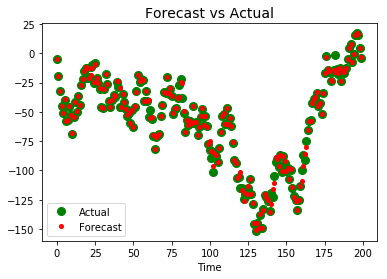

In [18]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=8, label="Forecast", color='red')
plt.legend(loc="lower left")
plt.xlabel("Time")

plt.show()

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/21_RNN_V3_files/image012.png)

## Summary

A recurrent neural network is a robust architecture to deal with time
series or text analysis. The output of the previous state is feedback to
preserve the memory of the network over time or sequence of words.

In TensorFlow, you can use the following codes to train a recurrent
neural network for time series:

## Parameters of the model

In [19]:
n_windows = 20
n_input = 1
n_output = 1
size_train = 201

## Define the model

```
X = tf.placeholder(tf.float32, [None, n_windows, n_input])
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron,
activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X,
dtype=tf.float32)

stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])
```

## Construct the optimization

```
learning_rate = 0.001

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
```

## Train the model

```
init = tf.global_variables_initializer()
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "tMSE:", mse)
    
    y_pred = sess.run(outputs, feed_dict={X: X_test})
```